<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250623_AutoML_%E5%BB%BA%E7%AB%8B%E6%A8%A1%E5%9E%8B(Heart)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [11]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = 'roc_auc'

# data_filename 訓練用資料的檔名
data_filename = '/dataset/Heart_Train.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/heart_prediction.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_heart'

# leaderboard_filename 模型評比結果檔名
leaderboard_filename = '/output/leaderboard_heart.csv'

In [8]:
# input_field 模型輸入的欄位名稱
input_field = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

# target_field 模型預測欄位名稱
target_field = 'target'


### 環境設定

In [3]:
#檢查執行環境是不是Colab
environment_type = 1
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon
    ! sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
    ! pip install pygraphviz

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ct

### 載入資料

In [4]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
1,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
3,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
4,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
199,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
200,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
201,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0


### <font color='blue'>顯示資料表欄位名稱</font>

In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# 訓練模型

In [9]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [14]:
working_field = input_field.copy()
working_field.append(target_field)
model = TabularPredictor(label=target_field, eval_metric=eval_metric, path=environment_base_folder+model_path).fit(train_data=data[working_field],num_bag_folds=5)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.63 GB / 12.67 GB (83.9%)
Disk Space Avail:   61.86 GB / 107.72 GB (57.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference s

### <font color='blue'>最佳模型名稱</font>

In [17]:
model.leaderboard().model.iloc[0]

'WeightedEnsemble_L2'

### <font color='blue'>預測問題種類</font>

In [18]:
model.problem_type

'binary'

### <font color='blue'>評估指標</font>

In [19]:
model.eval_metric

roc_auc

### <font color='blue'>使用的演算法</font>

In [21]:
model.leaderboard()['model'].tolist()

['WeightedEnsemble_L2',
 'NeuralNetFastAI_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'LightGBM_BAG_L1',
 'XGBoost_BAG_L1',
 'RandomForestGini_BAG_L1',
 'LightGBMXT_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1']

### <font color='blue'>leaderboard</font>

In [23]:
leaderboard = model.leaderboard(extra_info=True, silent=True)
leaderboard.to_csv(environment_base_folder+leaderboard_filename)
model.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.928222,roc_auc,0.423231,93.604087,0.000851,0.097705,2,True,14
1,NeuralNetFastAI_BAG_L1,0.917744,roc_auc,0.173409,33.771290,0.173409,33.771290,1,True,10
2,CatBoost_BAG_L1,0.915198,roc_auc,0.005699,13.751073,0.005699,13.751073,1,True,7
3,ExtraTreesEntr_BAG_L1,0.908245,roc_auc,0.129593,0.863092,0.129593,0.863092,1,True,9
4,NeuralNetTorch_BAG_L1,0.905210,roc_auc,0.078008,33.809660,0.078008,33.809660,1,True,12
5,ExtraTreesGini_BAG_L1,0.904034,roc_auc,0.192249,1.213638,0.192249,1.213638,1,True,8
6,LightGBM_BAG_L1,0.903692,roc_auc,0.009241,18.882989,0.009241,18.882989,1,True,4
7,XGBoost_BAG_L1,0.903055,roc_auc,0.035671,11.311267,0.035671,11.311267,1,True,11
8,RandomForestGini_BAG_L1,0.896494,roc_auc,0.223639,0.871267,0.223639,0.871267,1,True,5
9,LightGBMXT_BAG_L1,0.893067,roc_auc,0.010289,18.837911,0.010289,18.837911,1,True,3


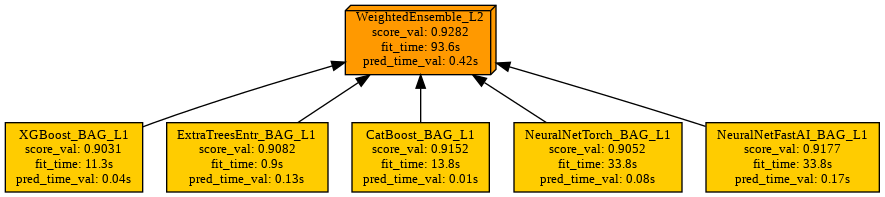

In [24]:
if environment_type == 1:
  path_to_png = model.plot_ensemble_model()
  from IPython.display import Image, display
  display(Image(filename=path_to_png))

# 輸出預測結果

In [25]:
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [27]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_csv(environment_base_folder+prediction_filename)

# 儲存模型

In [28]:
import pickle

result = {}
result['input_field'] = input_field
result['target_field'] = target_field

with open(environment_base_folder+model_path+'/used_field.bin', 'wb') as handle:
    pickle.dump(result, handle)

In [29]:
model.save()

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/output/model_heart")


# 欄位重要性

In [30]:
model.feature_importance(data)

Computing feature importance via permutation shuffling for 13 features using 203 rows with 5 shuffle sets...
	47.2s	= Expected runtime (9.44s per shuffle set)
	12.93s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ca,0.080748,0.017923,0.000273,5,0.117652,0.043845
cp,0.050548,0.007593,0.000059,5,0.066182,0.034915
thal,0.043694,0.011824,0.000585,5,0.068039,0.019349
oldpeak,0.020290,0.002745,0.000039,5,0.025942,0.014638
slope,0.013357,0.001918,0.000050,5,0.017307,0.009407
restecg,0.006816,0.002266,0.001272,5,0.011480,0.002151
trestbps,0.006757,0.003036,0.003807,5,0.013007,0.000506
sex,0.005817,0.002379,0.002723,5,0.010715,0.000918
age,0.005601,0.002826,0.005700,5,0.011420,-0.000217
exang,0.005229,0.000407,0.000004,5,0.006068,0.004391
